# Modelling COVID-19 with a SEIR model

The Covid-19 epidemic has caused in Italy and in other countries' a crisis unprecedented in modern times.

In this exercise we propose simulating the epidemic with a simple SEIR model.

**Nota Bene**: the results obtained should not be considered a serious model of the true values of the epidemic, which depend on much more complex variables.

## The SEIR model in brief

In a population there are several groups of individuals, characterized by four numbers

* Susceptibles $S$: number of individuals which can be infected
* Exposed $E$: number of individuals which have been infected but are not yet infectious
* Infectious $I$: number of individuals which are infectious
* Recovered $R$: number of individuals who have been infected and have recovered, acquiring (we hope) an immunity as well.

All these quantities are a function of time, which in the following is measured in day.
We will call $N(t) = S(t) + E(t) + I(t) + R(t)$ the total number of individuals in the population as a function of time $t$; in the model this number is not constant, and its initial value is $N(0) = N_0$.

Furthermore, we introduce several parameters
* The natural death rate $\mu$, namely the fraction of population dying each day: it is assumed equal to the birth rate, to keep the population stable.
* The force of the infection $\beta$: it is related to the probability that a susceptible person, coming in contact with an infected person, gets exposed actually.
* The delay from exposition to becoming infectious $\epsilon$: it is related to the time needed by an exposed person to become infectious.
* The rate of recovery $\gamma$: the inverse of the duration of an illness. We will assume that an infected person is contagious during the whole of his/her illness.

All these assumptions allow to model the evolution of the different components of the population; for the susceptible individuals one has
\begin{equation}
\frac{d S}{d t} = \mu (N - S) - \beta \frac{I\cdot S}{N}
\end{equation}
where the first term is the balance between births and natural deaths, the second term is the number of people being exposed per day; remember that $N$ is not constant, $N(t) = S(t) + E(t) + I(t) + R(t)$.

The exposed individuals change in time as
\begin{equation}
\frac{d E}{d t} = \beta \frac{I\cdot S}{N} - (\mu + \epsilon) E
\end{equation}
in which the first is a growth term due to infections, the second is a depletion term due to people dying naturally or becoming infectious.

In turn the infectious individuals change as
\begin{equation}
\frac{d I}{d t} = \epsilon E - (\gamma + \mu + \alpha) I
\end{equation}
in which the first term is the number of exposed becoming infectious per unit time, the second term models the reduction in the number of infectious individuals, because they recover ($\gamma$ term) or die for natural or Covid-19 related causes.

Finally for the recovered individuals we have
\begin{equation}
\frac{d R}{d t} = \gamma I - \mu R
\end{equation}

These equations are nonlinear because of the $\beta \frac{I\cdot S}{N}$ term, and we have therefore to integrate them numerically.

The total number of deaths $D_{Covid}(t)$ due to Covid-19 is of course modeled by the equation

\begin{equation}
\frac{d D_{Covid}}{d t} = \alpha I
\end{equation}

which can be confronted with the number of deaths due to other causes

\begin{equation}
\frac{d D_{Other}}{d t} = \mu N = \mu (S + E + I + R)
\end{equation}

in order to assess the severity of the epidemic.

## Model parameters

We will fix the values of the parameters, assuming the time measured in days:

* Birth (or death rate) $\mu = \frac{1}{83\times 365}\,\text{day}^{-1}\simeq 3.3\cdot 10^{-5}\,\text{day}^{-1}$
* Infection force $\beta = 0.25\,\text{day}^{-1}$
* Recovery rate $\gamma = \frac{1}{14}\,\text{day}^{-1}$ (which corresponds to an infection lasting two weeks).
* Delay rate $\epsilon = \frac{1}{3}\,\text{day}^{-1}$ (three days to become infectious)
* Fatality rate $\alpha = 0.0015\,\text{day}^{-1}$ (during 14 days, about 2\% of infectious people die)
* Total initial population $N_0 = 10^7$ (10 million habitants, as in Lombardy).

These values are very uncertain and should not be taken seriously beyond the scope of the exercise. In particular, the fatality rate depends strongly on the quality of the cures received, and if the health system gets overwhelmed it increases significantly.

An important derived parameter is the basic reproduction number ${\cal R}_0$ which represents the average number of new infections due to an infected individual, during his/her illness, assuming the whole population is susceptible: it is therefore given by
\begin{equation}
{\cal R}_0 = \frac{\beta \epsilon}{\left( \epsilon + \mu\right)\left(\gamma + \alpha + \mu\right)}
\end{equation}

With the assumed parameters, the basic reproduction number is therefore ${\cal R}_0 \simeq 3.4$, similar to what is observed at the peak of infection in Lombardy.

To control the infection, a government can reduce the parameter $\beta$ by imposing a lockdown, as Italy did early in March.

We will therefore also use the value $\beta_{lockdown} = 0.04\,\text{day}^{-1}$, which leads to a ${\cal R}_0 \simeq 0.55$.

We will use both values of $\beta$ in our simulation.

In [1]:
## Check

mu = 1/(83 * 365)
beta = 0.25
betaLockdown = 0.04
gamma = 1/14
epsilon = 1/3
alpha = 0.0015
print("r0 = ",(beta * epsilon)/((epsilon + mu)*(gamma + alpha + mu)))
print("r0_Lockdown = ",(betaLockdown * epsilon)/((epsilon + mu)*(gamma + alpha + mu)))

r0 =  3.426121601097443
r0_Lockdown =  0.5481794561755908


## Assignment


Write a code which integrates numerically the equations for $S, E, I, R, D_{Covid}, D_{Other}$, with a 1st order in time discretization scheme, for instance the forward Euler scheme.

Keep the discretization step $\Delta t$ distinct from the sampling step $\Delta t_s$ used to sample and save the values for the different quantities $N, S, E, I, R, D_{Covid}, D_{Other}$. You can keep $\Delta t_s = 1\,\text{day}$, hence at $1$ given that we are measuring the time in days.

The parameter $\beta$ should be also controllable during the simulation.

In the simulation, use the parameters discussed in the previous section, and as a starting condition assume that just one individual is exposed: namely $N_0 = 10^7, S_0 = N_0 - 1, E_0 = 1, I_0 = 0, R_0 = 0$. Then, integrate the equations for one year, sampling data each day and producing plots of the various variables.

Two simulations should be carried out: in the first one, the parameter $\beta$ is kept at $0.25\,\text{day}^{-1}$; it means that the epidemic is uncontrolled, which is the worst possible case.

In the second simulation, at the time when the number of deaths $D(t)$ exceeds $200$, a lockdown is imposed and the parameter $\beta$ is lowered to $0.04\,\text{day}^{-1}$ istantaneously.

The purpose is to compare the evolution of the epidemic in the two cases, for instance comparing the number of deaths, but also the number of people simultaneously infected, with and without a lockdown.

Plot the number of infected $I$, of recovered $R$ and of deaths $D_{Covid}, D_{Other}$ as a function of time, in the two cases. Superimpose the curves of the same quantitites to allow for a better comparison.

Plot also the number of deaths per day, calculated for instance from the difference in the total number of deaths in successive days.

Try different values of the integration step $\Delta t$, for instance $\Delta t = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.]$ and check the convergence and stability of the results as $\Delta t$ becomes smaller. 

To this end, define an error as the difference in norm $L_1$ between results obtained with different integration steps $\Delta t$, and the results obtained with the smaller integration step, as we did in some of the lessons.

Check that the error is $O(\Delta t)$, namely decreases linearly with $\Delta t$ decreasing.

## For better grades

In the previous section we have used a 1st order integration scheme: please implement also an higher order integration scheme, for instance one of the 2nd order integration schemes that have been proposed during the course.

Check that the convergence is effectively of the second order as $\Delta t$ becomes smaller, namely that the error is $O(\Delta t^2)$, namely it decreases quadratically as $\Delta t$ decreases.

## For even better grades

The fatality rate for Covid-19 depends on the quality of the cures. If an healthcare system gets overwhelmed, it may not be able to administer appropriate care, because the number of beds in Intensive Care Units is limited.

Let us assume that Lombardy has a maximum number of beds in ICU capped at $2\cdot 10^3$, that $10\%$ of the infectious $I$ require intensive care, and that people not receiving intensive care die with a fatality $\alpha$ ten times larger.

We model this behaviour with an effective $\alpha_{eff}$ which depends on the number $I$ as follows

\begin{equation}
\alpha_{eff}(I) = \alpha\cdot\left[\frac{11}{2} + \frac{9}{2}\tanh\left(\frac{I-2\cdot 10^4}{2\cdot 10^3}\right)\right]
\end{equation}

so that when $I$ goes above $2\cdot 10^4$, requiring all $2\cdot 10^3$ beds, the coefficient $\alpha$ grows by a factor 10.

Perform again the simulations using this variable $\alpha_{eff}$ and discuss how the results change.

## References

J.M.Carcione *et al.*, *A simulation of a COVID-19 epidemic based on deterministic SEIR model*, medRxiv preprint doi: https://doi.org/10.1101/2020.04.20.20072272, submitted to "Frontiers in Public Health"


# Resolution

Let's recall the equations:
\begin{equation}
\frac{d S}{d t} = \mu (N - S) - \beta \frac{I\cdot S}{N}
\end{equation}

\begin{equation}
\frac{d E}{d t} = \beta \frac{I\cdot S}{N} - (\mu + \epsilon) E
\end{equation}

\begin{equation}
\frac{d I}{d t} = \epsilon E - (\gamma + \mu + \alpha) I
\end{equation}

\begin{equation}
\frac{d R}{d t} = \gamma I - \mu R
\end{equation}

\begin{equation}
\frac{d D_{Covid}}{d t} = \alpha I
\end{equation}

\begin{equation}
\frac{d D_{Other}}{d t} = \mu N = \mu (S + E + I + R)
\end{equation}

And remember that:
\begin{equation}
{\cal R}_0 = \frac{\beta \epsilon}{\left( \epsilon + \mu\right)\left(\gamma + \alpha + \mu\right)}
\end{equation}

\begin{equation}
N(t) = S(t) + E(t) + I(t) + R(t)
\end{equation}

### Euler Method
All these equations are ODEs depending to the time.
To integrate these equations we will use the Euler method (first order) as follows:

If we take a general function $u$ depending to the time like $S(t), E(t) , I(t), R(t)$ we can say the followings.

From the definition of derivative:
\begin{equation}
u'(t) = \lim_{\Delta t\rightarrow 0} \frac{u(t+\Delta t)-u(t)}{\Delta t}
\end{equation}

If the step $\Delta t$ is already very small, we can _approximate_ the derivative by dropping the limit. So we can write:

\begin{equation}
u(t+\Delta t) \approx u(t) + u'(t) \Delta t
\end{equation}

The approximate solution at time $t_n$ is $u_n$, and the numerical solution of the differential equation consists of computing a sequence of approximate solutions by the following formula:

\begin{equation}
u_{n+1} = u_n + \Delta t \ u'_n
\end{equation}

So for our equations the Euler's method gives us the following algorithms:

\begin{equation}
S_{n+1} = S_n + \Delta t \left( \mu (N - S_n) - \beta \frac{I\cdot S_n}{N} \right)
\end{equation}

\begin{equation}
E_{n+1} = E_n + \Delta t \left( \beta \frac{I\cdot S}{N} - (\mu + \epsilon) E_n \right)
\end{equation}

\begin{equation}
I_{n+1} = I_n + \Delta t \left[ \epsilon E - (\gamma + \mu + \alpha) \cdot I_n \right]
\end{equation}

\begin{equation}
R_{n+1} = R_n + \Delta t \cdot ( \gamma I - \mu R_n)
\end{equation}

\begin{equation}
D^{Covid}_{n+1} = D^{Covid}_n + \Delta t \alpha I
\end{equation}

\begin{equation}
D^{Other}_{n+1} = D^{Other}_{n} + \Delta t \mu N
\end{equation}


Using a vectorial notation as follows we have:

\begin{align}
\mathbf{u} &= \begin{pmatrix} S \\ E \\ I \\ R \\ D^{Covid} \\ D^{Other} \end{pmatrix}
& \mathbf{u'} &=\begin{pmatrix}  \mu (N - S) - \beta \frac{I\cdot S}{N} \\ 
\beta \frac{I\cdot S}{N} - (\mu + \epsilon) E \\ 
\epsilon E - (\gamma + \mu + \alpha) \cdot I \\ 
\gamma I - \mu R \\
\alpha I \\
\mu N
\end{pmatrix}
\end{align}

So we can compute the results for our system of equations with:

\begin{equation}
\mathbf{u_{n+1}} = \mathbf{u_n} + \Delta t \mathbf{\ u'_n}
\end{equation}

For notation's semplicity we will use:
\begin{equation}
\mathbf{u'} = \mathbf{f(u)}
\end{equation}

## Let's code

In [2]:
# import libraries
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
# Set the initial parameters
mu = 1/(83 * 365)     # death rate
beta = 0.25           # infection force
betaLockdown = 0.04   # infection force with lockdown
gamma = 1/14          # recovery rate
epsilon = 1/3         # delay rate
alpha = 0.0015        # fatality rate

In [4]:
# function for checking R_0 value
def check_R_0(beta):
    """Return the value of R_0 for specific values of beta"""
    return (beta * epsilon)/((epsilon + mu)*(gamma + alpha + mu))

# check
print(check_R_0(beta))
print(check_R_0(betaLockdown))

3.426121601097443
0.5481794561755908


In [5]:
# Set initial conditions
N0 = 1e7 # inital population

# one exposed
S0 = N0 -1
E0 = 1
I0 = 0
R0 = 0     # NB this is R(0) different from R_0
D_c0 = 0   # deaths due to Covid-19
D_o0 = 0   # other deaths

## Euler method implementation
Let's create some functions to compute the solution

In [6]:
# To calculate f(u) == u'
# We want to control the value of beta
def f(u, beta):
    """Returns the derivative of the vector u 
    (RHS of the system of the equations).
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
    
    beta: float
          variable infection force.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    S = u[0]
    E = u[1]
    I = u[2]
    R = u[3]
    D_c = u[4] 
    D_o = u[5] 
    
    # N is not constant
    N = S + E + I + R 
    
    return np.array([mu*(N-S) - beta*((I*S)/N),
                    beta*((I*S)/N) - (mu+epsilon)*E,
                    epsilon*E - (gamma+mu+alpha)*I,
                    gamma*I - mu*R,
                    alpha*I,
                    mu*N])

In [7]:
# Euler step implementation
# We want to control the value of beta
def euler_step(u, f, dt, beta):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    beta: float
          variable infection force.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u, beta) # vettoriale

In [8]:
# create the grid
T = 365                          # final time in days (1 year)
dt = 0.1                         # time increment
N = int(T/dt)                    # number of time-steps
t = np.linspace(0, T, N)         # time discretization

In [9]:
# Euler's algoritm implementation
# during the whole simulation
# We want to control the value of beta
def euler_alg(f, dt, N, beta):
    """Returns the matrix u calculated with the Euler's method.
    
    Parameters
    ----------
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    N: int
        number of discretization points.
    beta: float
          variable infection force.
    
    Returns
    -------
    u : array of float (N x 6)
        matrix of solutions of the 6 equations at each time step.
    """
    
    # create the data structures
    # initialize the array containing the solution for each time-step
    # matrix for all the values
    u = np.empty((N, 6)) 
    # fill 1st element with initial values
    u[0] = np.array([S0, E0, I0, R0, D_c0, D_o0])
    
    # calculate overwriting u
    # time loop - Euler method
    for n in range(N-1):
        u[n+1] = euler_step(u[n], f, dt, beta)

    return u

## Plot the solution with Beta = 0.25

In [10]:
# frequency of sampling for plotting the graphic
# dt is the discretization step for calculating the solution
# while dt_samples is the sample step to display the graphic
dt_samples = 1 # 1 day: one sample each day (1/freq)
n_samples = int(T/dt_samples) # numero di sample

# 1 sample_step = N/(T/dt_samples) = 10 dt = 10 * 0.1
sample_step = int(N/n_samples)

# check
print('The number of points is:', N)           # T/dt = 3650
print('The number of samples is: ', n_samples) # T/dt_samples = 365
print('The sample step is: ', sample_step)     # N/n_samples = 10

# compute the numerical solution with Euler's algoritm
u = euler_alg(f, dt, N, beta)

# let's create a new matrix for saving the values of u to plot
g = np.empty((n_samples, 6))
# save only the elements in the rows with step of sample_step
# save one sample for each day
g = u[::sample_step, :]

The number of points is: 3650
The number of samples is:  365
The sample step is:  10


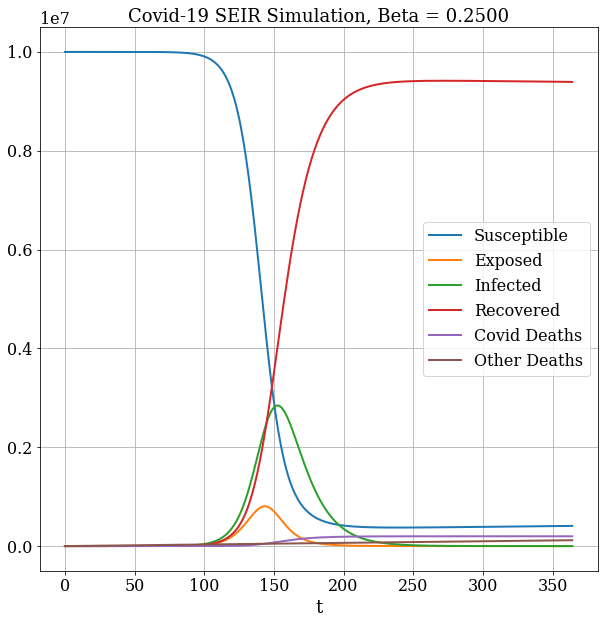

In [11]:
# visualization
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel(r't', fontsize=18)
plt.title('Covid-19 SEIR Simulation, Beta = %.4f' % beta, fontsize=18)

# time coordinate is sampled each day (1/sample_step of total time samples)

# plot of Susceptible people (index 0)
plt.plot(t[::sample_step], g[:,0], lw=2, label='Susceptible')
# plot of Exposed people (index 1)
plt.plot(t[::sample_step], g[:,1], lw=2, label='Exposed')
# plot of Infected people (index 2)
plt.plot(t[::sample_step], g[:,2], lw=2, label='Infected')
# plot of Recovered people (index 3)
plt.plot(t[::sample_step], g[:,3], lw=2, label='Recovered')
# plot of Covid dead people (index 4)
plt.plot(t[::sample_step], g[:,4], lw=2, label='Covid Deaths')
# plot of people dead for other causes (index 5)
plt.plot(t[::sample_step], g[:,5], lw=2, label='Other Deaths')
plt.legend()

Let's take a look of the results obtained. The number of susceptible people decrease while the number of recovered increase due to the infection. This is because a lot of people became infected in the same period. The number of exposed people is similar to the infected but not so big. The number of deaths for Covid is greater than the number of deaths for other causes and increases during the simulation.

## Appling lockdown, Beta = 0.04
Take a look at the results if we impose a lockdown at the **beginning** of the simulation. After that we will impose the lockdown only reached 200 deaths.

In [12]:
# Let's recall the previus code with different beta value
# compute the numerical solution with Euler's algoritm
# using the value of beta for lockdown
u_lockdown = euler_alg(f, dt, N, betaLockdown)

# let's create a new matrix for saving the values of u to plot
g_lockdown = np.empty((n_samples, 6))
# save only the elements in the rows with step of sample_step
# save one sample for each day
g_lockdown = u_lockdown[::sample_step, :]

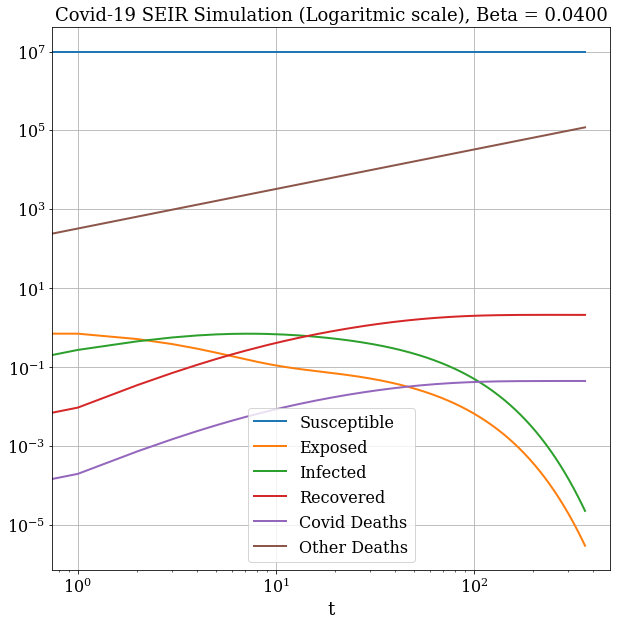

In [13]:
# visualization
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel(r't', fontsize=18)
plt.title('Covid-19 SEIR Simulation (Logaritmic scale), Beta = %.4f' % betaLockdown, fontsize=18)

# time coordinate is sampled each day (1/sample_step of total time samples)

# logaritmic scale for good visualization
# plot of Susceptible people (index 0)
plt.loglog(t[::sample_step], g_lockdown[:,0], lw=2, label='Susceptible')
# plot of Exposed people (index 1)
plt.loglog(t[::sample_step], g_lockdown[:,1], lw=2, label='Exposed')
# plot of Infected people (index 2)
plt.loglog(t[::sample_step], g_lockdown[:,2], lw=2, label='Infected')
# plot of Recovered people (index 3)
plt.loglog(t[::sample_step], g_lockdown[:,3], lw=2, label='Recovered')
# plot of Covid dead people (index 4)
plt.loglog(t[::sample_step], g_lockdown[:,4], lw=2, label='Covid Deaths')
# plot of people dead for other causes (index 5)
plt.loglog(t[::sample_step], g_lockdown[:,5], lw=2, label='Other Deaths')
plt.legend()

To analyse this graphic we need to consider that the scale used is logaritmic. In this ipotetical situation where lockdown is imposed at the beginning of the simulation Covid deaths and recovered people increases similarly. In this case Covid's deaths are 1 000 000 times less than the deaths for other causes. Exposed and so infected people deacreases drastically as we aspect with lockdown imposition.

## Imposing Lockdown after 200 deaths

Now we will create a function to change the value of beta during the simulation for imposing lockdown once reached 200 deaths. Rememebr that:

\begin{equation}
D^{Total}(t) = D^{Covid}(t) + D^{Other}(t)
\end{equation}

Let's recall the code for Euler's algoritm:

In [14]:
# Euler's algoritm implementation
# during the whole simulation
# We want to control the value of beta during the simulation
# We will impose lockdown only reached 200 deaths
def euler_alg_lockdown(f, dt, N, initial_beta, beta_lockdown, max_deaths):
    """Returns the matrix u calculated with the Euler's method.
    
    Parameters
    ----------
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    N: int
        number of discretization points.
    initial_beta: float
                  initial value for the infection force beta.
    beta_lockdown: float
                   beta value after appling the lockdown.
    max_deaths: int
                maximum numer of deaths before appling lockdown.
    
    Returns
    -------
    u : array of float (N x 6)
        matrix of solutions of the 6 equations at each time step.
    """
    
    # create the data structures
    # initialize the array containing the solution for each time-step
    # matrix for all the values
    u = np.empty((N, 6)) 
    # fill 1st element with initial values
    u[0] = np.array([S0, E0, I0, R0, D_c0, D_o0])
    
    # initial deaths
    total_deaths = 0
    
    # beta initial value
    beta = initial_beta
    
    # calculate overwriting u
    # time loop - Euler method
    for n in range(N-1):
        # We will impose lockdown only reached 200 deaths
        D_c = u[n, 4]      # deaths of covid in this step
        D_o = u[n, 5]      # deaths of other in this step
        total_deaths =  D_c + D_o
        
        if total_deaths > max_deaths:
            beta = beta_lockdown
            
        u[n+1] = euler_step(u[n], f, dt, beta)

    return u

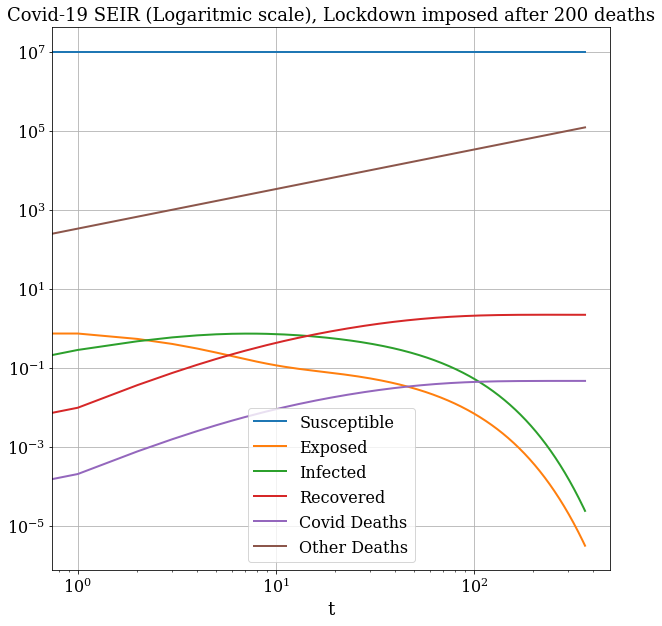

In [15]:
# And plot
# compute the numerical solution with Euler's algoritm
# We will impose lockdown only reached 200 deaths
u_lockdown2 = euler_alg_lockdown(f, dt, N, beta, betaLockdown, 200)

# let's create a new matrix for saving the values of u to plot
g_lockdown2 = np.empty((n_samples, 6))
# save only the elements in the rows with step of sample_step
# save one sample for each day
g_lockdown2 = u_lockdown2[::sample_step, :]

# visualization
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel(r't', fontsize=18)
plt.title('Covid-19 SEIR (Logaritmic scale), Lockdown imposed after 200 deaths', fontsize=18)

# time coordinate is sampled each day (1/sample_step of total time samples)

# logaritmic scale for good visualization
# plot of Susceptible people (index 0)
plt.loglog(t[::sample_step], g_lockdown2[:,0], lw=2, label='Susceptible')
# plot of Exposed people (index 1)
plt.loglog(t[::sample_step], g_lockdown2[:,1], lw=2, label='Exposed')
# plot of Infected people (index 2)
plt.loglog(t[::sample_step], g_lockdown2[:,2], lw=2, label='Infected')
# plot of Recovered people (index 3)
plt.loglog(t[::sample_step], g_lockdown2[:,3], lw=2, label='Recovered')
# plot of Covid dead people (index 4)
plt.loglog(t[::sample_step], g_lockdown2[:,4], lw=2, label='Covid Deaths')
# plot of people dead for other causes (index 5)
plt.loglog(t[::sample_step], g_lockdown2[:,5], lw=2, label='Other Deaths')
plt.legend()

Interesting! Imposing the lockdown just after 200 deaths we can't appriciate the difference between this and the lockdown imposed at the beginning. If we impose the lockdown after a great number of deaths we will impose the lockdown very late in the simulation and we will probably find a solution similar to the simulation without lockdown. Lets check:  

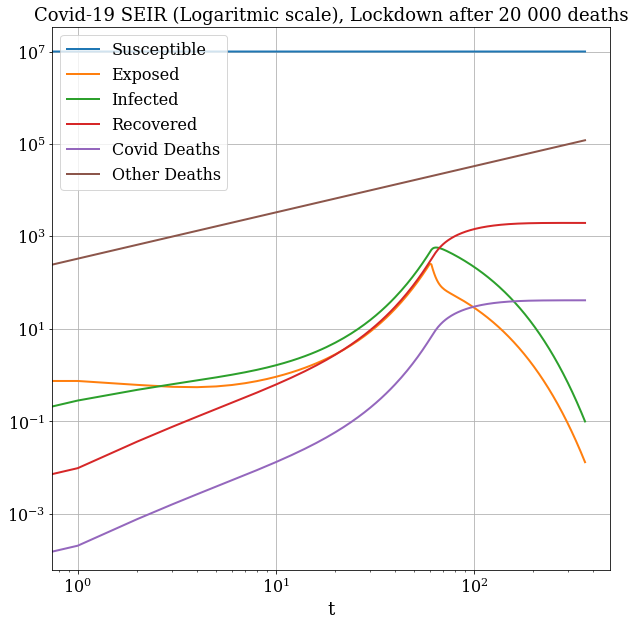

In [16]:
# compute the numerical solution with Euler's algoritm
# We will impose lockdown only reached 20 000 deaths
u_lockdown3 = euler_alg_lockdown(f, dt, N, beta, betaLockdown, 20000)

# let's create a new matrix for saving the values of u to plot
g_lockdown3 = np.empty((n_samples, 6))
# save only the elements in the rows with step of sample_step
# save one sample for each day
g_lockdown3 = u_lockdown3[::sample_step, :]

# visualization
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel(r't', fontsize=18)
plt.title('Covid-19 SEIR (Logaritmic scale), Lockdown after 20 000 deaths', fontsize=18)

# time coordinate is sampled each day (1/sample_step of total time samples)

# logaritmic scale for good visualization
# plot of Susceptible people (index 0)
plt.loglog(t[::sample_step], g_lockdown3[:,0], lw=2, label='Susceptible')
# plot of Exposed people (index 1)
plt.loglog(t[::sample_step], g_lockdown3[:,1], lw=2, label='Exposed')
# plot of Infected people (index 2)
plt.loglog(t[::sample_step], g_lockdown3[:,2], lw=2, label='Infected')
# plot of Recovered people (index 3)
plt.loglog(t[::sample_step], g_lockdown3[:,3], lw=2, label='Recovered')
# plot of Covid dead people (index 4)
plt.loglog(t[::sample_step], g_lockdown3[:,4], lw=2, label='Covid Deaths')
# plot of people dead for other causes (index 5)
plt.loglog(t[::sample_step], g_lockdown3[:,5], lw=2, label='Other Deaths')
plt.legend()

Imposing later the lockdown the number of deaths for Covid increases a lot. For this reason also the number of recovered people increase more than before. Obviously the number of exposed and infected increases.

# Comparing results
## Infected comparison

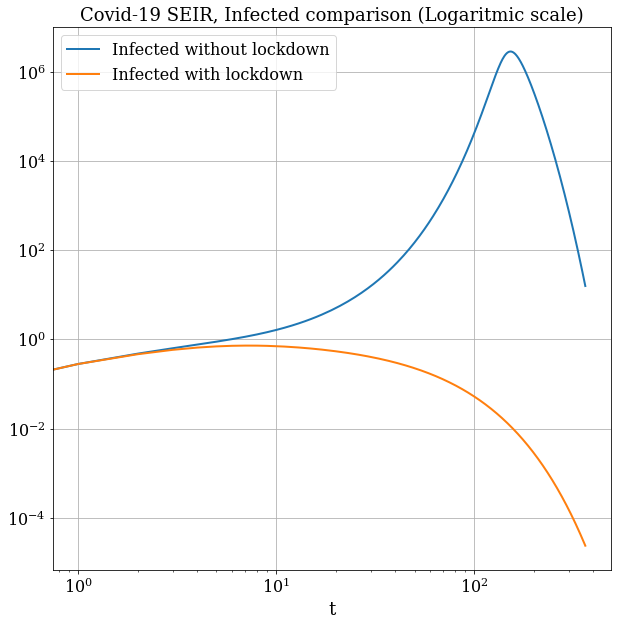

In [17]:
# plotting the results in the same graphic to compare them
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel(r't', fontsize=18)
plt.title('Covid-19 SEIR, Infected comparison (Logaritmic scale)', fontsize=18)

# Infected
# without lockdown
plt.loglog(t[::sample_step], g[:,2], lw=2, label='Infected without lockdown')
# imposing lockdown after 200 deaths
plt.loglog(t[::sample_step], g_lockdown2[:,2], lw=2, label='Infected with lockdown')
plt.legend()

The number of infected without lockdown increases exponentially while the number of infected with lockdown after 200 deaths decreses exponentially. This is due to the value of $ \beta $.

## Recovered comparison

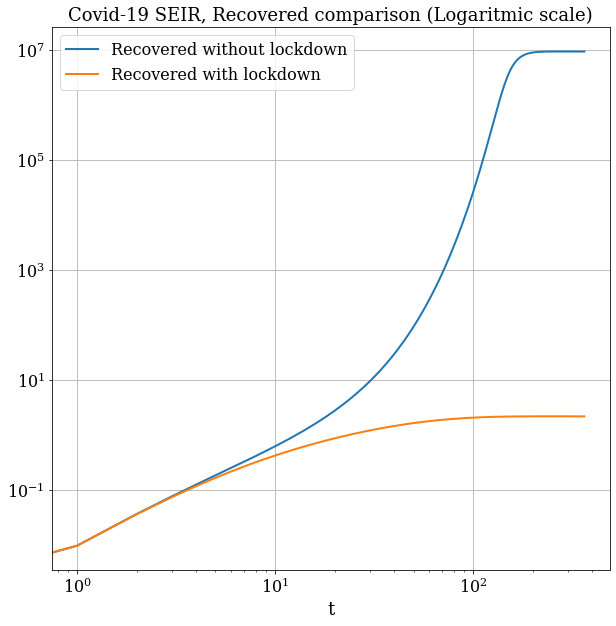

In [18]:
# plotting the results in the same graphic to compare them
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel(r't', fontsize=18)
plt.title('Covid-19 SEIR, Recovered comparison (Logaritmic scale)', fontsize=18)

# Recovered
# without lockdown
plt.loglog(t[::sample_step], g[:,3], lw=2, label='Recovered without lockdown')
# imposing lockdown after 200 deaths
plt.loglog(t[::sample_step], g_lockdown2[:,3], lw=2, label='Recovered with lockdown')
plt.legend()

As before the number of recovered people increases esponentially without lockdown while whit lockdown imposition this number became stable. This is due to the fact that all the people recovered were previously infected.

## Covid-19 Deaths comparison

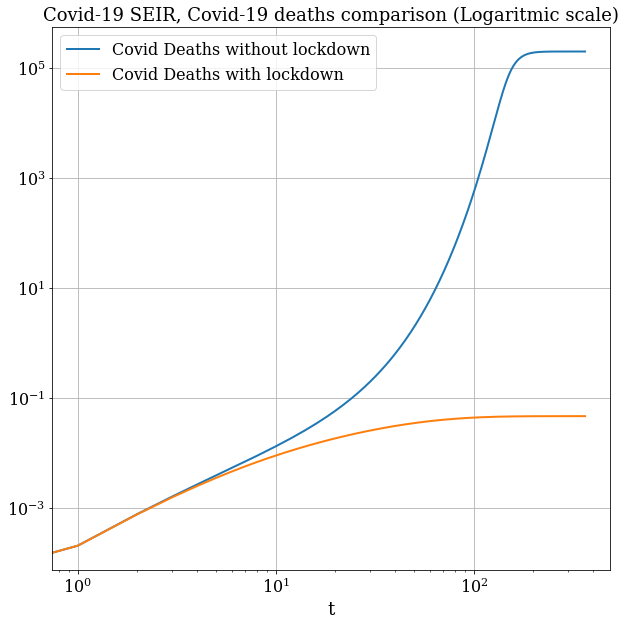

In [19]:
# plotting the results in the same graphic to compare them
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel(r't', fontsize=18)
plt.title('Covid-19 SEIR, Covid-19 deaths comparison (Logaritmic scale)', fontsize=18)

# Covid deaths
# without lockdown
plt.loglog(t[::sample_step], g[:,4], lw=2, label='Covid Deaths without lockdown')

# imposing lockdown after 200 deaths
plt.loglog(t[::sample_step], g_lockdown2[:,4], lw=2, label='Covid Deaths with lockdown')
plt.legend()

Like recovered people, deaths for Covid became exponentially higher whitout lockdown. 

## Other deaths comparison

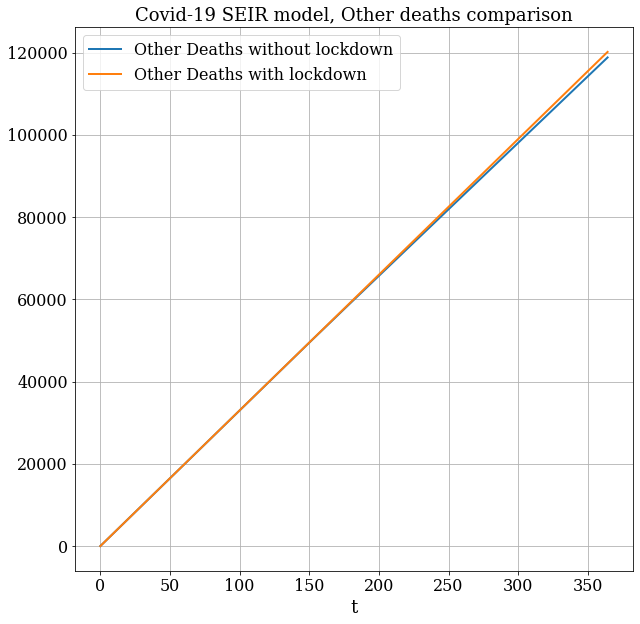

In [20]:
# plotting the results in the same graphic to compare them
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel(r't', fontsize=18)
plt.title('Covid-19 SEIR model, Other deaths comparison', fontsize=18)

# Other deaths
# without lockdown
plt.plot(t[::sample_step], g[:,5], lw=2, label='Other Deaths without lockdown')

# imposing lockdown after 200 deaths
plt.plot(t[::sample_step], g_lockdown2[:,5], lw=2, label='Other Deaths with lockdown')
plt.legend()

The simulation doesn't affect other causes of death so the values are unchanged.

# Number of deaths for each day

In [21]:
# function for calculating the number of deaths for each day
def deaths_for_day(g, g_lockdown):
    """ Return the number of deaths for each day with and without lockdown 
        for given solutions.
        
    Parameters:
        g:  array of float (N x 6)
            matrix of solutions of the 6 equations at each time step
            without lockdown imposition.
        g_lockdown : array of float (N x 6)
            matrix of solutions of the 6 equations at each time step
            with lockdown imposition
    
    Return:
        (deaths, deaths_lockdown):
            couple of vector witch corresponds to the values of deaths 
            for each day without and with lockdown imposition respectively.
    """
    
    # vector of  deaths for covid without lockdown
    D_c_vec = g[:, 4]
    # vector of  deaths for other without lockdown
    D_o_vec = g[:, 5]
    # somma vettoriale
    total_deaths =  D_c_vec + D_o_vec
    
    # vector of  deaths for covid with lockdown
    D_c_vec_lockdown = g_lockdown[:, 4]
    # vector of deaths for other with lockdown
    D_o_vec_lockdown = g_lockdown[:, 5]
    # somma vettoriale
    total_deaths_lockdown =  D_c_vec_lockdown + D_o_vec_lockdown
    
    # temporary array
    deaths = np.empty_like(total_deaths)
    deaths_lockdown = np.empty_like(total_deaths_lockdown)
    
    # deaths for each day
    # difference between total deaths in successive days (D_n+1 - D_n)
    # bulk
    deaths[1:] = total_deaths[1:] - total_deaths[:-1]
    deaths_lockdown[1:] = total_deaths_lockdown[1:] - total_deaths_lockdown[:-1]
    
    # border points (initial)
    deaths[0] = 0
    deaths_lockdown[0] = 0

    return deaths, deaths_lockdown

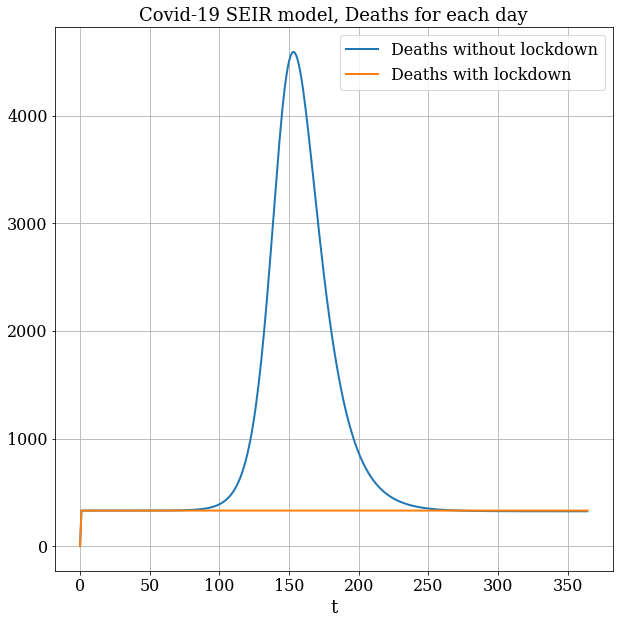

In [22]:
# compute the solution
deaths, deaths_lockdown = deaths_for_day(g, g_lockdown)

# And plot
# plotting the results in the same graphic to compare them
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel(r't', fontsize=18)
plt.title('Covid-19 SEIR model, Deaths for each day', fontsize=18)

# Other deaths
# without lockdown
plt.plot(t[::sample_step], deaths, lw=2, label='Deaths without lockdown')

# imposing lockdown after 200 deaths
plt.plot(t[::sample_step], deaths_lockdown, lw=2, label='Deaths with lockdown')
plt.legend()

The number of daily deaths for Covid are obviously higher without lockdown and seems to follow a normal distribution. With lockdown the number of daily deaths became constant.

# Convergence and stability
Since we don't have an analytical solution, we will use smaller values of $\Delta t$ to check the convergence of the method and prove his stability. To do that we will use the L1 norm (for a general function $z$):

\begin{equation}
E = \Delta t \sum_{\Delta t > \Delta t'} \left|z_{\Delta t} - z_{\Delta t'}\right| 
\end{equation}

Where $E$ is the error of the computational solution if $z_{\Delta t'}$ is the exact (analytical) solution. We can use the difference of the numerical solutions computed on different grids (in our case $E$ is not an error) to study the convergence of the method, even without an analytical solution.

For smaller and smaller values of $\Delta t$ where $\Delta t'$ is the value for the finest grid. In our case:
$\Delta t = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.]$ and $\Delta t' = 0.01$.

### Convergence without lockdown imposition

In [23]:
# Let's create the array to store the solutions for each value of dt
# without imposing lockdown
def solutions_for_grid(dt_values):
    """ Function to compute the array of solutions for each value of 
        given dt without lockdown.
        
    Parameters:
        dt_values: array of floats
            numpy array containing different values of dt to compare
            the grids (ordered from minimum to maximum).
    
    Returns:
        t_values: array of floats
            values of time discretization for each value of dt.
        u_values: array of length dt_values, of matrix (N x 6)
            array for containing the matrix of the solutions (N x 6)
            for each value of dt."""
    
    # initialize the vector of matrices (solutions N x 6)
    u_values = np.empty_like(dt_values, dtype=np.ndarray)
    
    # for each value of dt create the matrix u of solutions 
    # and store in u_values
    for i, dt in enumerate(dt_values):
        
        # different for each value of dt
        N = int(T/dt)
        
        # different for different number of points N
        t_values = np.linspace(0.0, T, N)
    
        # initialize the array containing the solution for each time-step
        u = euler_alg(f, dt, N, beta)
    
        # store the value of u related to one grid
        # u_values is a vector of matrices u (N x 6)
        # for each value of dt (dt_values)
        u_values[i] = u # one matrix for each dt_values (7 times)
    
    return t_values, u_values

In [24]:
# let's compute u_values for given dt
dt_values = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.])
t_values, u_values = solutions_for_grid(dt_values)

In [25]:
# Let's take a look of what is u_values
# u_values is a vector of matrices
print(np.shape(u_values[0]), # 1st matrix with dt = 0.01
np.shape(u_values[1]), # 2nd matrix with dt = 0.02
np.shape(u_values[2]), # 3rd matrix with dt = 0.05
np.shape(u_values[3]), # 4th matrix with dt = 0.1
np.shape(u_values[4]), # 5th matrix with dt = 0.2 
np.shape(u_values[5]), # 6th matrix with dt = 0.5
np.shape(u_values[6])) # 7th matrix with dt = 1

(36500, 6) (18250, 6) (7300, 6) (3650, 6) (1825, 6) (730, 6) (365, 6)


In [26]:
# to check if u_values is a vector of seven matrices
print(u_values)

[array([[9.99999900e+06, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.99999900e+06, 9.96666337e-01, 3.33333333e-03, 0.00000000e+00,
        0.00000000e+00, 3.30087473e+00],
       [9.99999900e+06, 9.93352120e-01, 6.65312240e-03, 2.38095238e-06,
        5.00000000e-08, 6.60174946e+00],
       ...,
       [4.11966162e+05, 5.76357947e-01, 1.50242507e+01, 9.38948480e+06,
        1.98533438e+05, 1.19113074e+05],
       [4.11969260e+05, 5.76015277e-01, 1.50152100e+01, 9.38948171e+06,
        1.98533438e+05, 1.19116309e+05],
       [4.11972358e+05, 5.75672811e-01, 1.50061747e+01, 9.38947862e+06,
        1.98533439e+05, 1.19119545e+05]])
 array([[9.99999900e+06, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.99999900e+06, 9.93332673e-01, 6.66666667e-03, 0.00000000e+00,
        0.00000000e+00, 6.60174946e+00],
       [9.99999900e+06, 9.86743133e-01, 1.32791563e-02, 9.52380952e-06,
        2

In [27]:
# Let's compute the differences between grids
from math import ceil
def get_diffgrid(u_current, u_fine, dt):
    """Returns the difference between one grid and the fine one 
        using L-1 norm.
    
    Parameters:
        u_current : array of float
            solution on the current grid.
        u_fine : array of float
            solution on the fine grid.
        dt : float
            time-increment on the current grid.
    
    Returns:
        diffgrid : float
                difference computed in the L-1 norm.
    """
    
    # number of rows for the matrices
    N_current = np.shape(u_current)[0] # (rows, coloumns)
    N_fine = np.shape(u_fine)[0] # (rows, coloumns)

    
    # Calculating the ratio of the two grid sizes will tell us how many 
    # elements in our fine-grid will span over one element 
    # in our coarser grid
    grid_size_ratio = int(ceil(N_fine/N_current))
    
    # u_current and u_fine will be instances of u_values[i] (matrix 2D)
    # u_current and u_fine have different rows dimension  
    # due to different grids (values of dt)
    # computing the differences with norm L1
    diffgrid = dt * np.sum( np.abs(\
                        u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
    return diffgrid

In [28]:
# compute difference between one grid solution and the finest one
def compute_diffgrid(u_values):
    """ Routine to compute the diffgrid of the solutions to 
        check the convergence of the method for each value of dt.
    
    Parameters:
        u_values: array of length dt_values, of matrix (N x 6)
            array containing the matrix of the solutions (N x 6)
            for each value of dt.
    
    Returns:
        diffgrid: array of floats
            differences between """
    diffgrid = np.empty_like(dt_values)

    for i, dt in enumerate(dt_values):
        print('dt = {}'.format(dt))
    
        u_finest = u_values[0]
        u_current = u_values[i]
    
        #call the function get_diffgrid()
        diffgrid[i] = get_diffgrid(u_current, u_finest, dt)
        
    return diffgrid
diffgrid = compute_diffgrid(u_values)

dt = 0.01
dt = 0.02
dt = 0.05
dt = 0.1
dt = 0.2
dt = 0.5
dt = 1.0


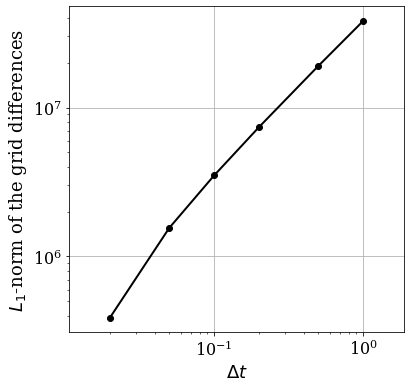

In [29]:
# log-log plot of the grid differences
plt.figure(figsize=(6,6))
plt.grid(True)
plt.xlabel('$\Delta t$', fontsize=18)
plt.ylabel('$L_1$-norm of the grid differences', fontsize=18)
plt.axis('equal')
# Remember to skip the difference of the finest-grid solution with itself, which is zero
# infact get_diffgrid(u_values[0], u_values[0], dt) == [0 .. 0]
plt.loglog(dt_values[1:], diffgrid[1:], color='k', ls='-', lw=2, marker='o')

### Convergence with lockdown imposition
To do that we can modify a little bit the function 

In [30]:
# Let's create the array to store the solutions for each value of dt
# with imposing lockdown after 200 deaths
def solutions_for_grid_lockdown(dt_values):
    """ Function to compute the array of solutions for each value of 
        given dt with lockdown imposition.
        
    Parameters:
        dt_values: array of floats
            numpy array containing different values of dt to compare
            the grids (ordered from minimum to maximum).
    
    Returns:
        t_values: array of floats
            values of time discretization for each value of dt.
        u_values: array of length dt_values, of matrix (N x 6)
            array for containing the matrix of the solutions (N x 6)
            for each value of dt."""
    
    # initialize the vector of matrices (solutions N x 6)
    u_values = np.empty_like(dt_values, dtype=np.ndarray)
    
    # for each value of dt create the matrix u of solutions 
    # and store in u_values
    for i, dt in enumerate(dt_values):
        
        # different for each value of dt
        N = int(T/dt)
        
        # different for different number of points N
        t_values = np.linspace(0.0, T, N)
    
        # initialize the array containing the solution for each time-step
        u = euler_alg_lockdown(f, dt, N, beta, betaLockdown, 200) # CHANGES
    
        # store the value of u related to one grid
        # u_values is a vector of matrices u (N x 6)
        # for each value of dt (dt_values)
        u_values[i] = u # one matrix for each dt_values (7 times)
    
    return t_values, u_values

In [31]:
# let's compute u_values for given dt
# dt_values doesn't change
t_values_lockdown, u_values_lockdown = solutions_for_grid_lockdown(dt_values)

# Let's compute the diffgrid
diffgrid2 = compute_diffgrid(u_values_lockdown) 

dt = 0.01
dt = 0.02
dt = 0.05
dt = 0.1
dt = 0.2
dt = 0.5
dt = 1.0


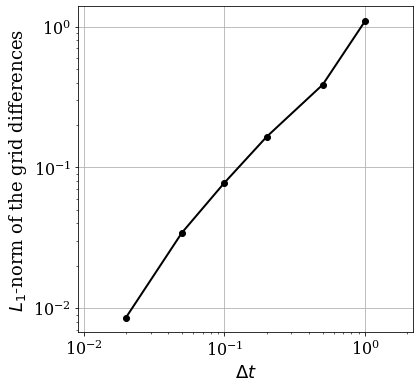

In [32]:
# And plot
# log-log plot of the grid differences
plt.figure(figsize=(6,6))
plt.grid(True)
plt.xlabel('$\Delta t$', fontsize=18)
plt.ylabel('$L_1$-norm of the grid differences', fontsize=18)
plt.axis('equal')
# Remember to skip the difference of the finest-grid solution with itself, which is zero
# infact get_diffgrid(u_values[0], u_values[0], dt) == [0 .. 0]
plt.loglog(dt_values[1:], diffgrid2[1:], color='k', ls='-', lw=2, marker='o')

From the graphics above we conclude that the Euler's method seems to converge in both the two simulations (with and without lockdown).

### Order of convergence

To compute the order of convergence, since we don't have an analytical solution, we will use 3 grid resolutions that are refined at a constant ratio $r$ to find the *observed order of convergence* ($p$), which is given by:

\begin{equation}
p = \frac{\log \left(\frac{f_3-f_2}{f_2-f_1} \right) }{\log(r)}
\end{equation}

where $f_1$ is the finest mesh solution, and $f_3$ the coarsest.  

In [33]:
# Let's check the order of convergence
# parameters
r = 2
h = 0.001 

# vector of parameters for dt
dt_values3 = np.array([h, r*h, r**2*h])

#vector of matrices
u_values3 = np.empty_like(dt_values3, dtype=np.ndarray) 

# compute using function
t_values, u_values3 = solutions_for_grid(dt_values3)

# temporary vector of 2 elements for results
diffgrid3 = np.empty(2)
    
#calculate f2 - f1
diffgrid3[0] = get_diffgrid(u_values3[1], u_values3[0], dt_values3[1])

#calculate f3 - f2
diffgrid3[1] = get_diffgrid(u_values3[2], u_values3[1], dt_values3[2])

# calculate the order of convergence
# NB log(A/B) = log(A) - log(B)
p = (np.log(diffgrid3[1]) - np.log(diffgrid3[0])) / np.log(r)

print('The order of convergence is p = {:.3f}'.format(p))

The order of convergence is p = 1.000


# For better grades

# Tring a second order method: RK-2
To obtain a better accuracy we will use a second order method to compute the solution, instead of using Euler's method. This method is known as the *explicit midpoint method* or the *modified Euler method*. Notice that we had to apply the right-hand side, $~f(u)$, twice.

\begin{align}
u_{n+1/2}   & = u_n + \frac{\Delta t}{2} f(u_n) \\
u_{n+1} & = u_n + \Delta t \,\, f(u_{n+1/2})
\end{align}

This two step method is also called RK-2 (Runge-Kutta 2nd order).  

### Without lockdown

In [34]:
# Let's implement the RK2 step
# without lockdown
def rk2_step(u, f, dt, beta):
    """Returns the solution at the next time-step using 2nd-order Runge-Kutta.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    beta: float
          variable infection force.
    
    Returns
    -------
    u_n_plus_1 : array of float
        solution at the next time step.
    """
    u_star = u + 0.5*dt*f(u, beta)
    return u + dt*f(u_star, beta)

In [35]:
# And implement the RK2 algoritm similar to Euler one
# let's recall the code without lockdown
def rk2_alg(f, dt, N, beta):
    """Returns the matrix u calculated with the RK2 method.
    
    Parameters
    ----------
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    beta: float
          variable infection force.
    
    Returns
    -------
    u : array of float (N x 6)
        matrix of solutions of the 6 equations at each time step.
    """
    
    # create the data structures
    # initialize the array containing the solution for each time-step
    # matrix for all the values
    u = np.empty((N, 6)) 
    # fill 1st element with initial values
    u[0] = np.array([S0, E0, I0, R0, D_c0, D_o0])
    
    # calculate overwriting u
    # time loop - RK2 method
    for n in range(N-1):
        u[n+1] = rk2_step(u[n], f, dt, beta)

    return u

In [36]:
# Same as the one at the beginning of the simulation
# frequency of sampling for plotting the graphic
# dt is the discretization step for calculating the solution
# while dt_samples is the sample step to display the graphic
dt_samples = 1 # 1 day: one sample each day (1/freq)
n_samples = int(T/dt_samples) # numero di sample

# 1 sample_step = N/(T/dt_samples) = 10 dt = 10 * 0.1
sample_step = int(N/n_samples)

# compute the numerical solution with Euler's algoritm
u_rk2 = rk2_alg(f, dt, N, beta)

# let's create a new matrix for saving the values of u to plot
g_rk2 = np.empty((n_samples, 6))
# save only the elements in the rows with step of sample_step
# save one sample for each day
g_rk2 = u[::sample_step, :]

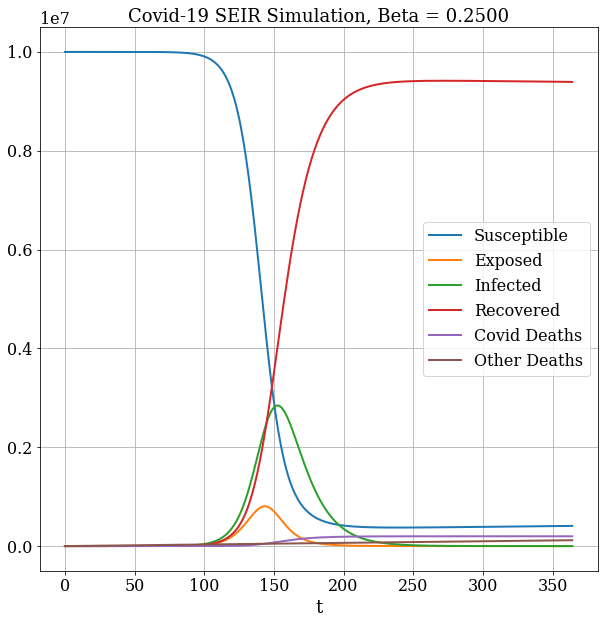

In [37]:
# visualization
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel(r't', fontsize=18)
plt.title('Covid-19 SEIR Simulation, Beta = %.4f' % beta, fontsize=18)

# time coordinate is sampled each day (1/sample_step of total time samples)

# plot of Susceptible people (index 0)
plt.plot(t[::sample_step], g_rk2[:,0], lw=2, label='Susceptible')
# plot of Exposed people (index 1)
plt.plot(t[::sample_step], g_rk2[:,1], lw=2, label='Exposed')
# plot of Infected people (index 2)
plt.plot(t[::sample_step], g_rk2[:,2], lw=2, label='Infected')
# plot of Recovered people (index 3)
plt.plot(t[::sample_step], g_rk2[:,3], lw=2, label='Recovered')
# plot of Covid dead people (index 4)
plt.plot(t[::sample_step], g_rk2[:,4], lw=2, label='Covid Deaths')
# plot of people dead for other causes (index 5)
plt.plot(t[::sample_step], g_rk2[:,5], lw=2, label='Other Deaths')
plt.legend()

Seem it works! Now we will try with lockdown imposition.
### With Lockdown imposition

In [38]:
# like before
def rk2_alg_lockdown(f, dt, N, initial_beta, beta_lockdown, max_deaths):
    """Returns the matrix u calculated with the RK2 method.
    
    Parameters
    ----------
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    initial_beta: float
                  initial value for the infection force beta.
    beta_lockdown: float
                   beta value after appling the lockdown.
    max_deaths: int
                maximum numer of deaths before appling lockdown.
    
    Returns
    -------
    u : array of float (N x 6)
        matrix of solutions of the 6 equations at each time step.
    """
    
    # create the data structures
    # initialize the array containing the solution for each time-step
    # matrix for all the values
    u = np.empty((N, 6)) 
    # fill 1st element with initial values
    u[0] = np.array([S0, E0, I0, R0, D_c0, D_o0])
    
    # initial deaths
    total_deaths = 0
    
    # beta initial value
    beta = initial_beta
    
    # calculate overwriting u
    # time loop - RK2 method
    for n in range(N-1):
        # We will impose lockdown only reached 200 deaths
        D_c = u[n, 4]      # deaths of covid in this step
        D_o = u[n, 5]      # deaths of other in this step
        total_deaths =  D_c + D_o
        
        if total_deaths > max_deaths:
            beta = beta_lockdown
            
        u[n+1] = rk2_step(u[n], f, dt, beta)

    return u

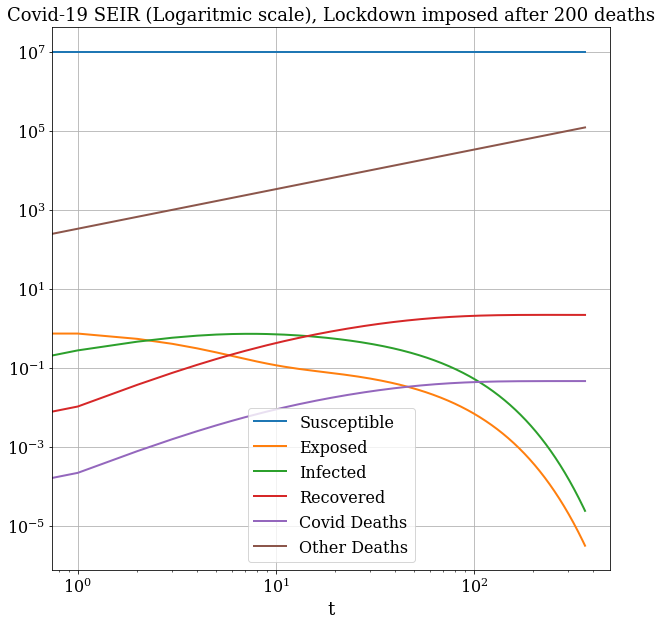

In [39]:
# And plot
# compute the numerical solution with RK2 algoritm
# We will impose lockdown only reached 200 deaths
u_rk2_lockdown = rk2_alg_lockdown(f, dt, N, beta, betaLockdown, 200)

# let's create a new matrix for saving the values of u to plot
g_rk2_lockdown = np.empty((n_samples, 6))
# save only the elements in the rows with step of sample_step
# save one sample for each day
g_rk2_lockdown = u_rk2_lockdown[::sample_step, :]

# visualization
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel(r't', fontsize=18)
plt.title('Covid-19 SEIR (Logaritmic scale), Lockdown imposed after 200 deaths', fontsize=18)

# time coordinate is sampled each day (1/sample_step of total time samples)

# logaritmic scale for good visualization
# plot of Susceptible people (index 0)
plt.loglog(t[::sample_step], g_rk2_lockdown[:,0], lw=2, label='Susceptible')
# plot of Exposed people (index 1)
plt.loglog(t[::sample_step], g_rk2_lockdown[:,1], lw=2, label='Exposed')
# plot of Infected people (index 2)
plt.loglog(t[::sample_step], g_rk2_lockdown[:,2], lw=2, label='Infected')
# plot of Recovered people (index 3)
plt.loglog(t[::sample_step], g_rk2_lockdown[:,3], lw=2, label='Recovered')
# plot of Covid dead people (index 4)
plt.loglog(t[::sample_step], g_rk2_lockdown[:,4], lw=2, label='Covid Deaths')
# plot of people dead for other causes (index 5)
plt.loglog(t[::sample_step], g_rk2_lockdown[:,5], lw=2, label='Other Deaths')
plt.legend()

## Check convergence

In [40]:
# solution for grid with rk2 method
# Let's create the array to store the solutions for each value of dt
# without imposing lockdown
def solutions_for_grid_rk2(dt_values):
    """ Function to compute the array of solutions for each value of 
        given dt without lockdown.
        
    Parameters:
        dt_values: array of floats
            numpy array containing different values of dt to compare
            the grids (ordered from minimum to maximum).
    
    Returns:
        t_values: array of floats
            values of time discretization for each value of dt.
        u_values: array of length dt_values, of matrix (N x 6)
            array for containing the matrix of the solutions (N x 6)
            for each value of dt."""
    
    # initialize the vector of matrices (solutions N x 6)
    u_values = np.empty_like(dt_values, dtype=np.ndarray)
    
    # for each value of dt create the matrix u of solutions 
    # and store in u_values
    for i, dt in enumerate(dt_values):
        
        # different for each value of dt
        N = int(T/dt)
        
        # different for different number of points N
        t_values = np.linspace(0.0, T, N)
    
        # initialize the array containing the solution for each time-step
        u = rk2_alg(f, dt, N, beta) # CHANGES
    
        # store the value of u related to one grid
        # u_values is a vector of matrices u (N x 6)
        # for each value of dt (dt_values)
        u_values[i] = u # one matrix for each dt_values (7 times)
    
    return t_values, u_values

dt = 0.01
dt = 0.02
dt = 0.05
dt = 0.1
dt = 0.2
dt = 0.5
dt = 1.0


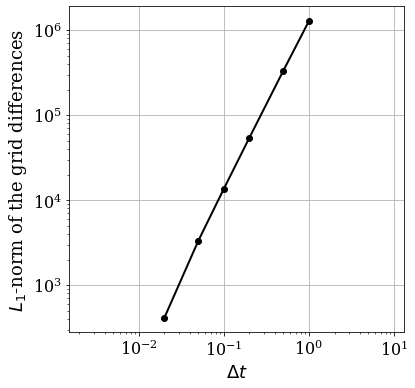

In [41]:
# without lockdown
# same as before
t_values_rk2, u_values_rk2 = solutions_for_grid_rk2(dt_values)
diffgrid4 = compute_diffgrid(u_values_rk2)

# And plot
# log-log plot of the grid differences
plt.figure(figsize=(6,6))
plt.grid(True)
plt.xlabel('$\Delta t$', fontsize=18)
plt.ylabel('$L_1$-norm of the grid differences', fontsize=18)
plt.axis('equal')
# Remember to skip the difference of the finest-grid solution with itself, which is zero
# infact get_diffgrid(u_values[0], u_values[0], dt) == [0 .. 0]
plt.loglog(dt_values[1:], diffgrid4[1:], color='k', ls='-', lw=2, marker='o')

Here we can see that the RK2 method is a second order method because if we decrease the value of $\Delta t$ by a factor 1 we obtain a L1 norm decreased of a factor 2 (instead of 1 like in the Euler's method).

In [42]:
# Let's check the order of convergence without lockdown
# parameters
r = 2
h = 0.001 

# vector of parameters for dt
dt_values3 = np.array([h, r*h, r**2*h])

#vector of matrices
u_values3 = np.empty_like(dt_values3, dtype=np.ndarray) 

# compute using function
t_values, u_values3 = solutions_for_grid_rk2(dt_values3)

# temporary vector of 2 elements for results
diffgrid3 = np.empty(2)
    
#calculate f2 - f1
diffgrid3[0] = get_diffgrid(u_values3[1], u_values3[0], dt_values3[1])

#calculate f3 - f2
diffgrid3[1] = get_diffgrid(u_values3[2], u_values3[1], dt_values3[2])

# calculate the order of convergence
# NB log(A/B) = log(A) - log(B)
p = (np.log(diffgrid3[1]) - np.log(diffgrid3[0])) / np.log(r)

print('The order of convergence is p = {:.3f}'.format(p))

The order of convergence is p = 2.000


# For even better grades
Let's recall the value of $\alpha_{eff}$ if the healthcare system gets overwhelmed and run the simulation again.

\begin{equation}
\alpha_{eff}(I) = \alpha\cdot\left[\frac{11}{2} + \frac{9}{2}\tanh\left(\frac{I-2\cdot 10^4}{2\cdot 10^3}\right)\right]
\end{equation}

In [43]:
# Let's OVERWRITE the function f with the new parameter
# we will impose alpha = alpha_eff
def f(u, beta):
    """Returns the derivative of the vector u 
    (RHS of the system of the equations) if the heathcare system
    gets overwhelmed.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
    
    beta: float
          variable infection force.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    S = u[0]
    E = u[1]
    I = u[2]
    R = u[3]
    D_c = u[4] 
    D_o = u[5] 
    
    # N is not constant
    N = S + E + I + R
    
    # calculate alpha_eff
    alpha_eff = alpha*(11/2+9/2*np.tanh((I-2e4)/2e3))
    
    return np.array([mu*(N-S) - beta*((I*S)/N),
                    beta*((I*S)/N) - (mu+epsilon)*E,
                    epsilon*E - (gamma+mu+alpha_eff)*I,
                    gamma*I - mu*R,
                    alpha_eff*I,
                    mu*N])

### Without lockdown

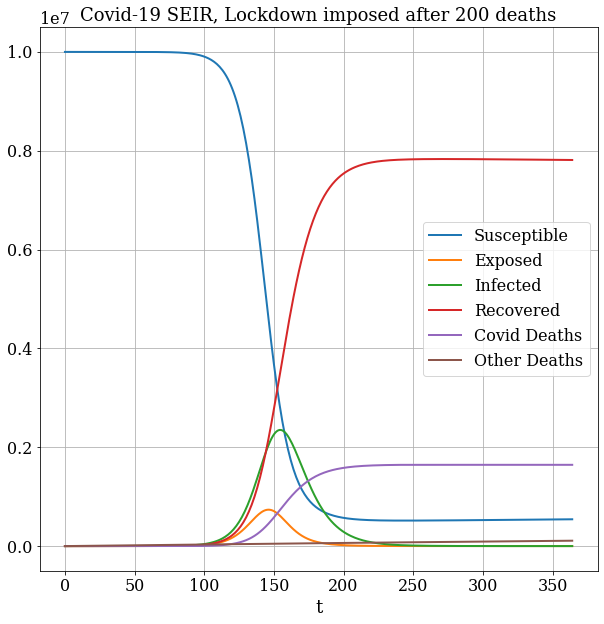

In [44]:
# And plot without lockdown
# compute the numerical solution with RK2 algoritm
u_rk2 = rk2_alg(f, dt, N, beta)

# let's create a new matrix for saving the values of u to plot
g_rk2 = np.empty((n_samples, 6))
# save only the elements in the rows with step of sample_step
# save one sample for each day
g_rk2 = u_rk2[::sample_step, :]

# visualization
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel(r't', fontsize=18)
plt.title('Covid-19 SEIR, Lockdown imposed after 200 deaths', fontsize=18)

# time coordinate is sampled each day (1/sample_step of total time samples)

# plot of Susceptible people (index 0)
plt.plot(t[::sample_step], g_rk2[:,0], lw=2, label='Susceptible')
# plot of Exposed people (index 1)
plt.plot(t[::sample_step], g_rk2[:,1], lw=2, label='Exposed')
# plot of Infected people (index 2)
plt.plot(t[::sample_step], g_rk2[:,2], lw=2, label='Infected')
# plot of Recovered people (index 3)
plt.plot(t[::sample_step], g_rk2[:,3], lw=2, label='Recovered')
# plot of Covid dead people (index 4)
plt.plot(t[::sample_step], g_rk2[:,4], lw=2, label='Covid Deaths')
# plot of people dead for other causes (index 5)
plt.plot(t[::sample_step], g_rk2[:,5], lw=2, label='Other Deaths')
plt.legend()

In this simulation we can see that in case of healthcare system gets overwhelmed, deaths for covid increases drastically. As a consequence of this, recovered people are lesser than in the simulation at the beginning of this notebook. 

### With lockdown imposition

In [45]:
# compute the numerical solution with RK2 algoritm
# We will impose lockdown only reached 200 deaths
u_rk2_lockdown = rk2_alg_lockdown(f, dt, N, beta, betaLockdown, 200)

# let's create a new matrix for saving the values of u to plot
g_rk2_lockdown = np.empty((n_samples, 6))
# save only the elements in the rows with step of sample_step
# save one sample for each day
g_rk2_lockdown = u_rk2_lockdown[::sample_step, :]

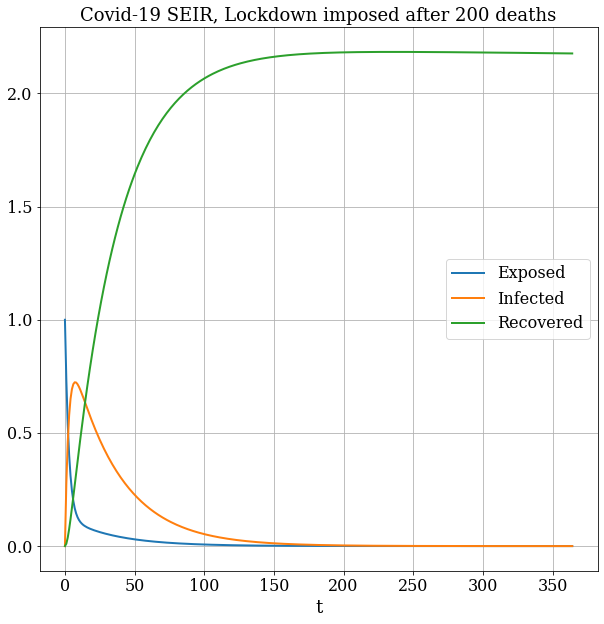

In [46]:
# visualization 1
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel(r't', fontsize=18)
plt.title('Covid-19 SEIR, Lockdown imposed after 200 deaths', fontsize=18)

# time coordinate is sampled each day (1/sample_step of total time samples)

# plot of Exposed people (index 1)
plt.plot(t[::sample_step], g_rk2_lockdown[:,1], lw=2, label='Exposed')
# plot of Infected people (index 2)
plt.plot(t[::sample_step], g_rk2_lockdown[:,2], lw=2, label='Infected')
# plot of Recovered people (index 3)
plt.plot(t[::sample_step], g_rk2_lockdown[:,3], lw=2, label='Recovered')
plt.legend()

If we impose lockdown after 200 deaths, even if the healthcare system gets overwhelmed, the number of exposed people decrease exponentially, like infected people. As a consequence, the number of recovered people raise exponentially.

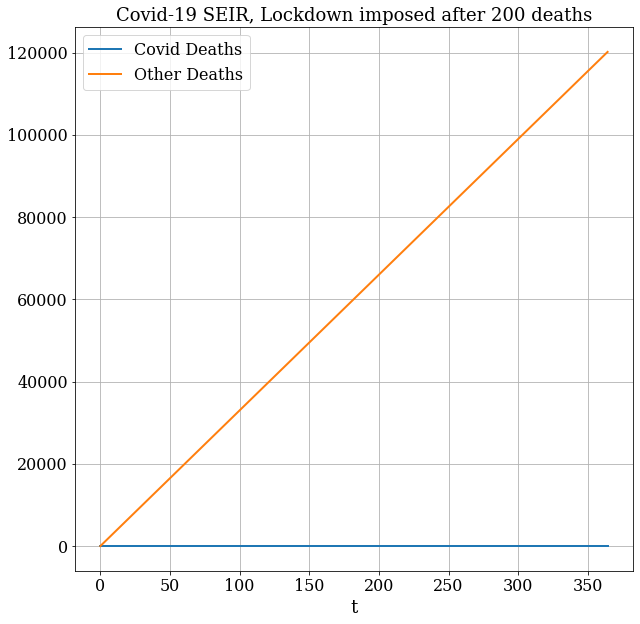

In [47]:
# visualization 2
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel(r't', fontsize=18)
plt.title('Covid-19 SEIR, Lockdown imposed after 200 deaths', fontsize=18)

# plot of Covid dead people (index 4)
plt.plot(t[::sample_step], g_rk2_lockdown[:,4], lw=2, label='Covid Deaths')
# plot of people dead for other causes (index 5)
plt.plot(t[::sample_step], g_rk2_lockdown[:,5], lw=2, label='Other Deaths')
plt.legend()

Imposing lockdown after 200 deaths, even if the healthcare system gets overwhelmed, Covid deaths are lesser than Other causes' deaths. 

###### (C) Montanari Matteo Marco, 299166, sept. 2021